# From transfer function to difference equation
In approximately the middle of Peter Corke's lecture [Introduction to digital control](https://youtu.be/XuR3QKVtx-g?t=34m56s), he explaines how to go from a transfer function description of a controller (or compensator) to a difference equation that can be implemented on a microcontroller. 

The idea is to recognize that the term $$ sX(s) $$ in a transfer function is the laplace transform of the derivative of $x(t)$, 
\begin{equation}
sX(s) + x(0) \quad \overset{\mathcal{L}}{\longleftrightarrow} \quad \frac{d}{dt} x(t)
\end{equation}
and to use a discrete approximation of the derivative 
$$ \frac{d}{dt}x(t) \approx \frac{x(t-h) - x(t)}{h}, $$
where $h$ is the time between the samples in the sampled version of signal $x(t)$. 

The steps to convert the system on transfer function form
$$ Y(s) = F(s)U(s) = \frac{s+b}{s+a}U(s) $$
are to write
$$ (s+a)Y(s) = (s+b)U(s) $$
$$ sY(s) + aY(s) = sU(s) + bU(s), $$
take the inverse Laplace transform
$$ \frac{d}{dt} y + ay = \frac{d}{dt} u + bu$$
and use the discrete approximation of the derivative
$$ \frac{y_k - y_{k-1}}{h} + ay_k = \frac{u_k - u_{k-1}}{h} + bu_k $$
which can be written
$$ (1+ah) y_k = y_{k-1} + u_k - u_{k-1} + bh u_k,$$
or
$$ y_k = \frac{1}{1+ah} y_{k-1} + \frac{1+bh}{1+ah}u_k - \frac{1}{1+ah}u_{k-1}. $$


## Example
With the system
$$ F(s) =  \frac{s+1}{s+2} $$ 
and the sampling time
$$ h=0.1 $$
we get the difference equation
$$ y_k = \frac{1}{1.2}y_{k-1} + \frac{1.1}{1.2}u_k - \frac{1}{1.2} u_{k-1}. $$

Let's implement the system and see how the discrete approximation compares to the continuous-time system

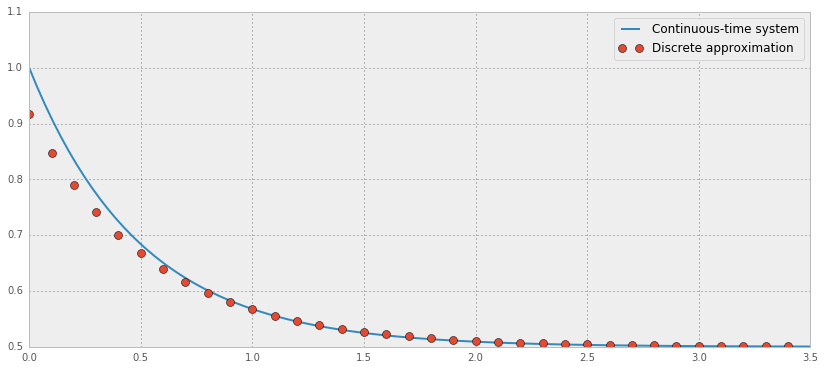

In [7]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
%matplotlib inline

# Define the continuous-time linear time invariant system F
num = [1, 1]
den = [1, 2]
F = signal.lti(num, den)

# Plot a step response
(t, y) = signal.step(F)
plt.figure(figsize=(14,6))
plt.plot(t, y, linewidth=2)

# Solve the difference equation y_k = c y_{k-1} + d_0 u_k + d_1 u_{k-1}
c = 1.0/1.2
d0 = 1.1/1.2
d1 = -c

h = 0.1 # The sampling time
td = np.arange(35)* h #The sampling time instants
ud = np.ones(35) # The input signal is a step, limited in time to 3.5 seconds
yd = np.zeros(35) # A vector to hold the discrete output signal
yd[0] = c*0 + d0*ud[0] - d1*0 # The first sample of the output signal
for k in range(1,35): # And then the rest
    yd[k] = c*yd[k-1] + d0*ud[k] + d1*ud[k-1]
    
plt.plot(td, yd, 'o', markersize=8)

plt.legend(('Continuous-time system', 'Discrete approximation'))

## Exercise
Make a discrete approximation of the transfer function
$$ F(s) = \frac{3}{s+3} $$
using the sampling time
$$ h=0.2 $$
Then simulate and plot a step-response for the continuous- and discrete system, following the example above.

*Hint*: Copy the python code for the examplle into the cell below and modify for the exercise.